In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_data.csv')
y = df['poi']
df.drop(['name', 'email_address', 'poi'], axis=1, inplace=True)
df.drop(['loan_advances'], axis=1, inplace=True)
print(df.shape)
df.head(5)

(113, 18)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      61 non-null     float64
 1   deferral_payments          28 non-null     float64
 2   deferred_income            34 non-null     float64
 3   director_fees              13 non-null     float64
 4   exercised_stock_options    81 non-null     float64
 5   expenses                   73 non-null     float64
 6   from_messages              65 non-null     float64
 7   from_poi_to_this_person    65 non-null     float64
 8   from_this_person_to_poi    65 non-null     float64
 9   long_term_incentive        49 non-null     float64
 10  other                      69 non-null     float64
 11  restricted_stock           82 non-null     float64
 12  restricted_stock_deferred  10 non-null     float64
 13  salary                     73 non-null     float64

In [4]:
fin_ratio_cols = ['bonus', 'expenses', 'other', 'salary']

for col in fin_ratio_cols:
    df[col + '_ratio'] = df[col] / df['total_payments']

df['to_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages']
df['from_poi_ratio'] = df['from_this_person_to_poi'] / df['from_messages']
df['stock_to_salary'] = df['total_stock_value'] / df['salary']
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,...,905.0,505050.0,22542539.0,3.465003,0.092961,0.346182,0.832860,0.046409,0.222222,53.591559
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,...,3627.0,8682716.0,26093672.0,0.644959,0.003379,0.002548,0.127985,0.024262,0.277778,23.481201
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,...,225.0,2003885.0,2493616.0,0.099806,0.011420,0.785137,0.105717,0.057778,0.358974,11.771001
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,602671.0,...,NaN,2652612.0,985032.0,0.301590,0.044535,0.342116,0.084560,NaN,NaN,4.391485
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,375304.0,...,2598.0,1639297.0,126027.0,0.762522,0.021850,0.000296,0.146520,0.076597,0.173611,0.524699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,500000.0,NaN,NaN,NaN,NaN,16514.0,NaN,NaN,NaN,NaN,...,NaN,1112087.0,511734.0,0.449605,0.014850,0.320183,0.215363,NaN,NaN,2.136659
109,NaN,NaN,NaN,NaN,NaN,49288.0,41.0,13.0,1.0,NaN,...,1486.0,49288.0,NaN,NaN,1.000000,NaN,NaN,0.008748,0.024390,NaN
110,300000.0,NaN,NaN,NaN,28798.0,31653.0,67.0,7.0,0.0,NaN,...,898.0,1386690.0,28798.0,0.216343,0.022826,NaN,0.472375,0.007795,0.000000,0.043964
111,NaN,NaN,NaN,NaN,NaN,475.0,19.0,4.0,7.0,NaN,...,573.0,475.0,2217299.0,NaN,1.000000,NaN,NaN,0.006981,0.368421,NaN


In [6]:
fin_features = ['salary', 'deferral_payments', 'total_payments', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'director_fees',
                'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock']
email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages', 
                  'from_this_person_to_poi', 'shared_receipt_with_poi']
ratio_features = ['to_poi_ratio', 'from_poi_ratio', 'bonus_ratio', 'expenses_ratio', 'other_ratio', 'salary_ratio', 'stock_to_salary']

<ipython-input-7-3dd43bd56acf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


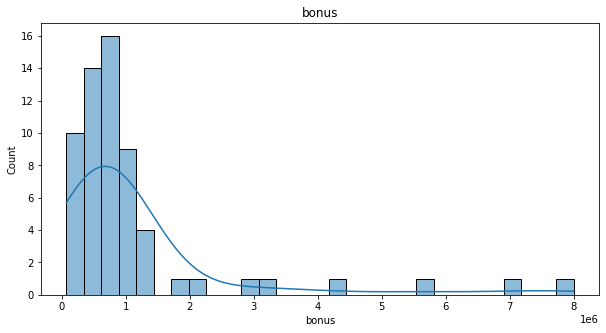

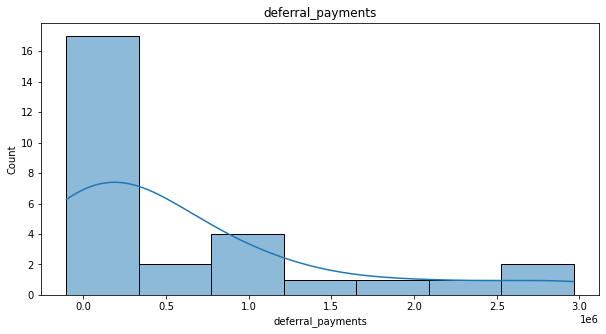

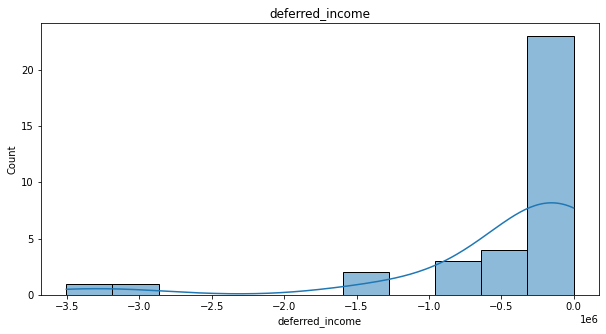

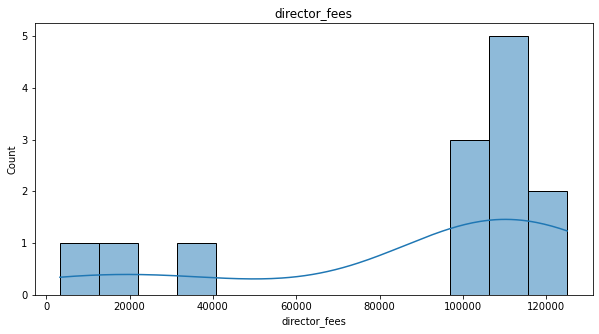

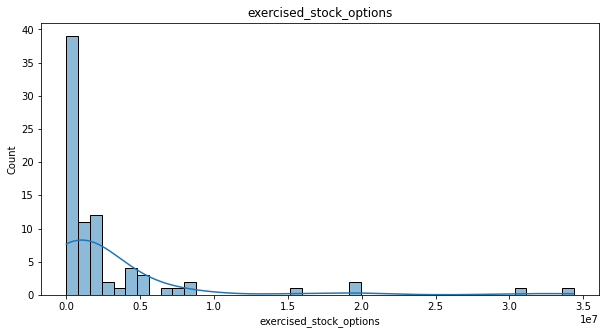

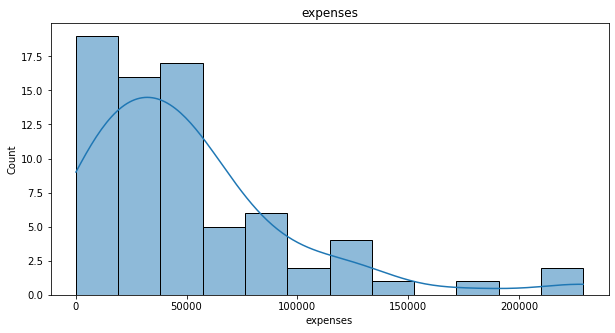

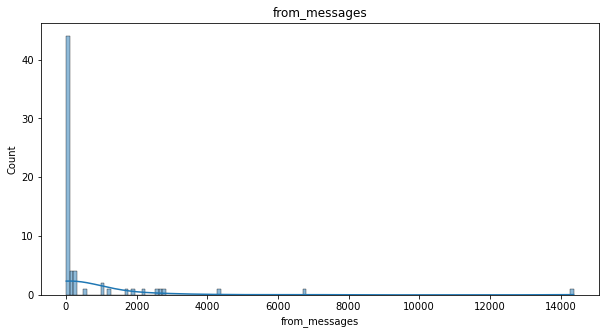

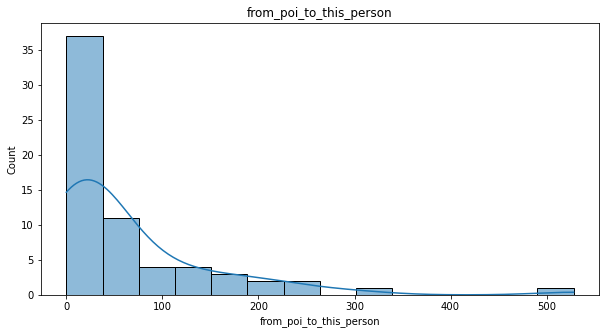

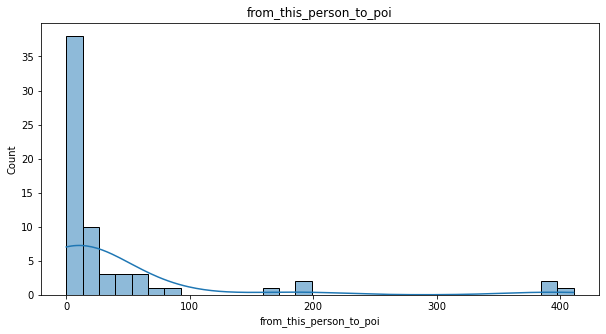

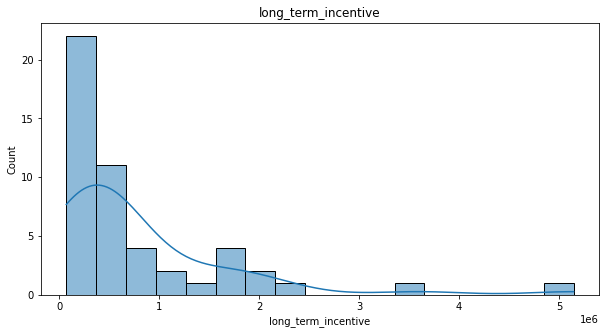

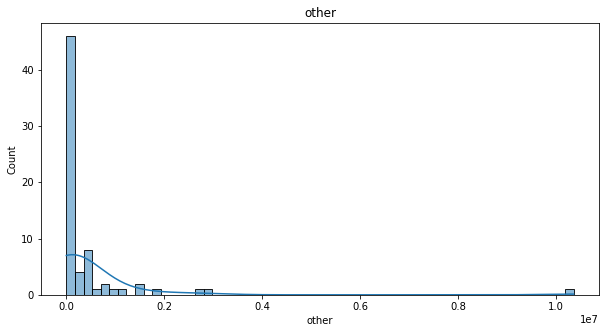

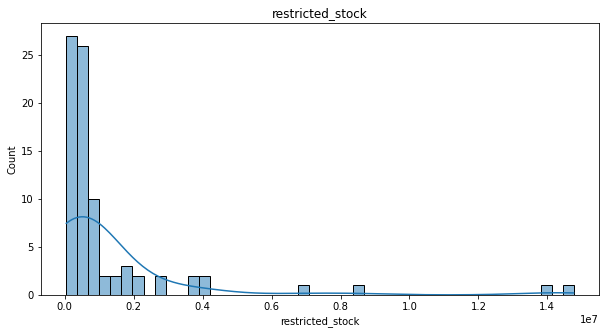

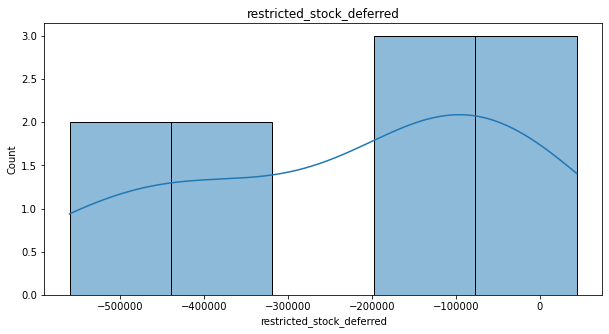

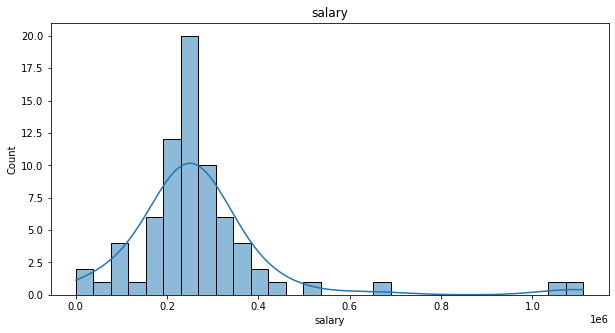

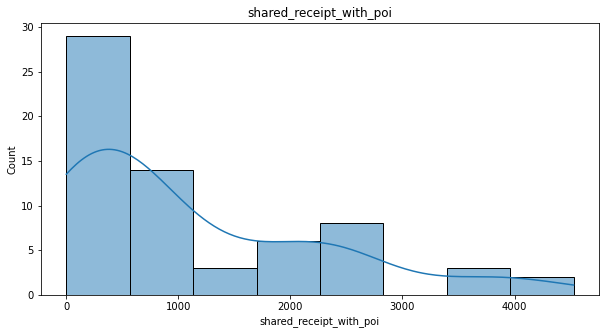

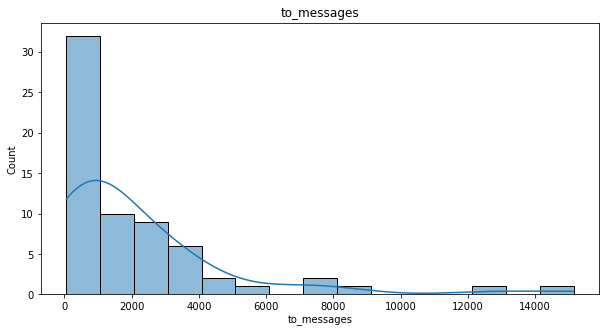

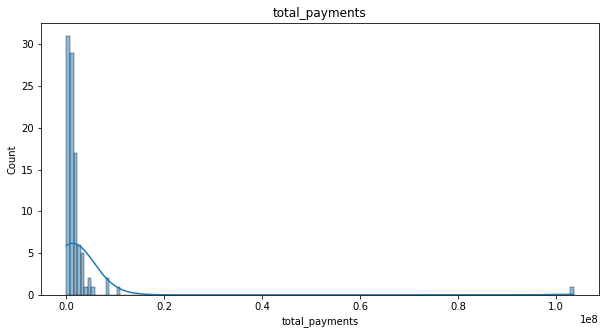

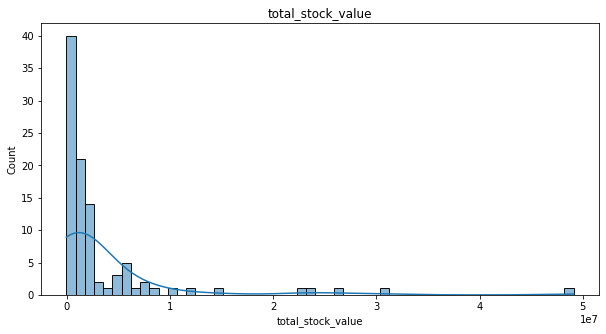

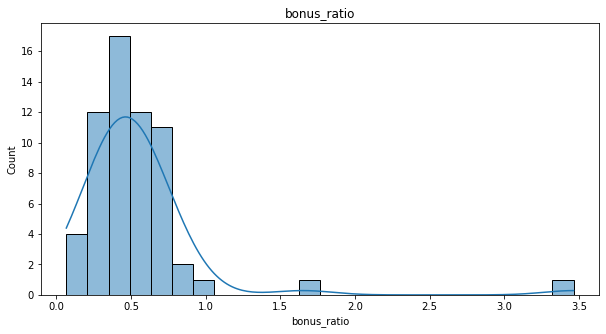

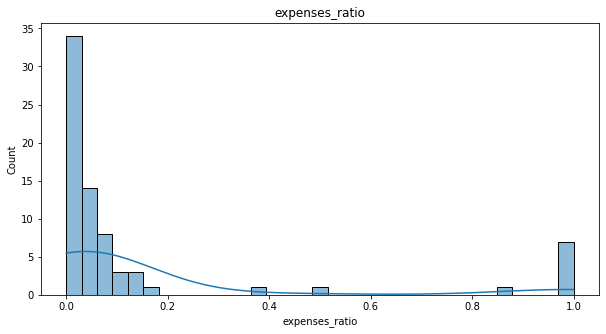

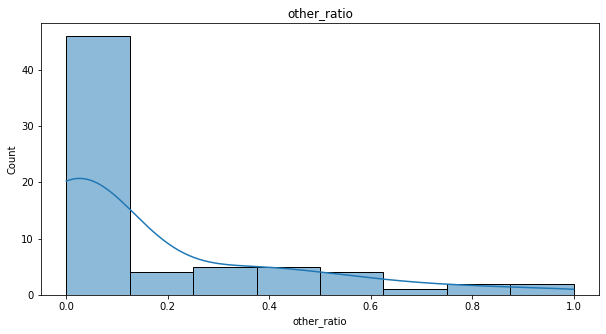

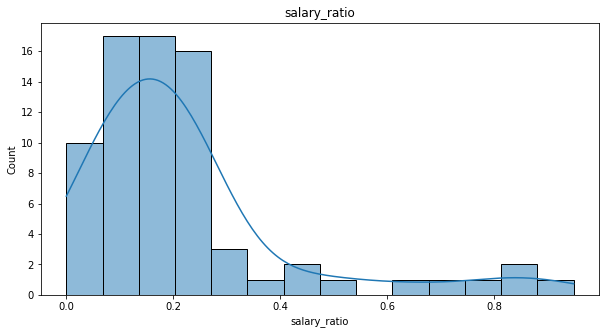

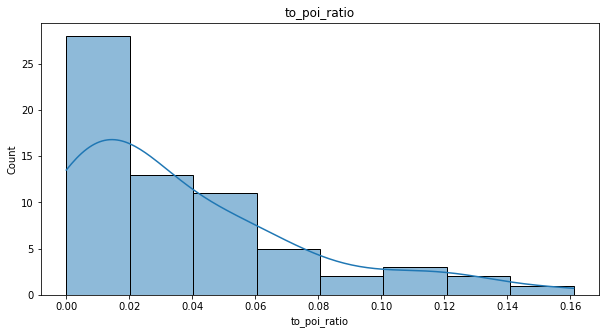

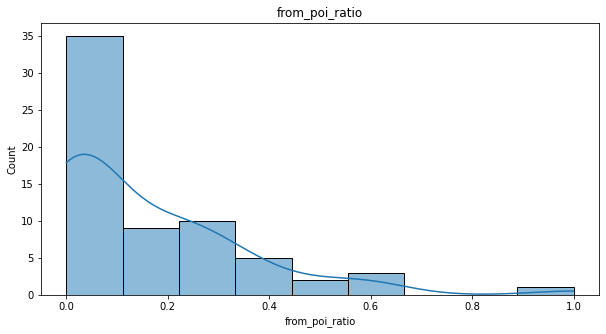

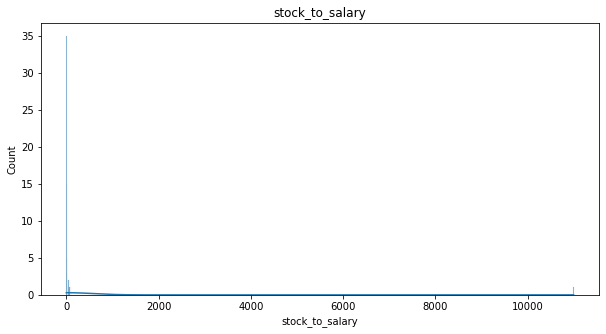

In [7]:
for i in range(len(df.columns)):
    if df.columns[i] != 'poi':
        plt.figure(figsize=(10,5))
        plt.title(df.columns[i])
        sns.histplot(df[df.columns[i]], kde=True)
plt.show()

In [8]:
bool_features = ['deferral_payments', 'deferred_income', 'director_fees', 'restricted_stock_deferred']

for index, row in df.iterrows():
    for col in bool_features:
        if pd.isnull(row[col]):
            df.loc[index, col] = 0
        else:
            df.loc[index, col] = 1
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,1750000.0,0.0,1.0,0.0,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,...,905.0,505050.0,22542539.0,3.465003,0.092961,0.346182,0.832860,0.046409,0.222222,53.591559
1,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,...,3627.0,8682716.0,26093672.0,0.644959,0.003379,0.002548,0.127985,0.024262,0.277778,23.481201
2,200000.0,0.0,1.0,0.0,1624396.0,22884.0,39.0,13.0,14.0,NaN,...,225.0,2003885.0,2493616.0,0.099806,0.011420,0.785137,0.105717,0.057778,0.358974,11.771001
3,800000.0,0.0,0.0,0.0,NaN,118134.0,NaN,NaN,NaN,602671.0,...,NaN,2652612.0,985032.0,0.301590,0.044535,0.342116,0.084560,NaN,NaN,4.391485
4,1250000.0,0.0,1.0,0.0,NaN,35818.0,144.0,199.0,25.0,375304.0,...,2598.0,1639297.0,126027.0,0.762522,0.021850,0.000296,0.146520,0.076597,0.173611,0.524699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,500000.0,0.0,0.0,0.0,NaN,16514.0,NaN,NaN,NaN,NaN,...,NaN,1112087.0,511734.0,0.449605,0.014850,0.320183,0.215363,NaN,NaN,2.136659
109,NaN,0.0,0.0,0.0,NaN,49288.0,41.0,13.0,1.0,NaN,...,1486.0,49288.0,NaN,NaN,1.000000,NaN,NaN,0.008748,0.024390,NaN
110,300000.0,0.0,0.0,0.0,28798.0,31653.0,67.0,7.0,0.0,NaN,...,898.0,1386690.0,28798.0,0.216343,0.022826,NaN,0.472375,0.007795,0.000000,0.043964
111,NaN,0.0,0.0,0.0,NaN,475.0,19.0,4.0,7.0,NaN,...,573.0,475.0,2217299.0,NaN,1.000000,NaN,NaN,0.006981,0.368421,NaN


D:\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-9-6950fae4f62a>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


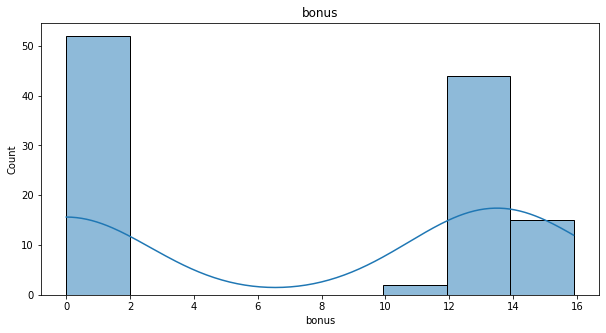

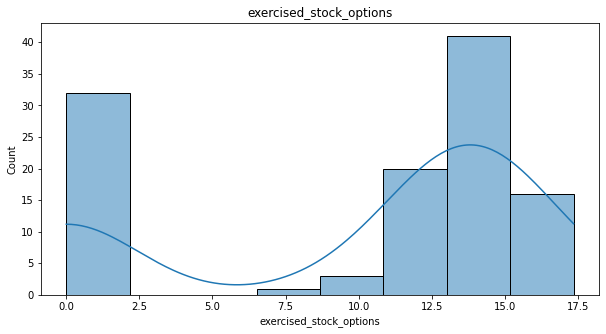

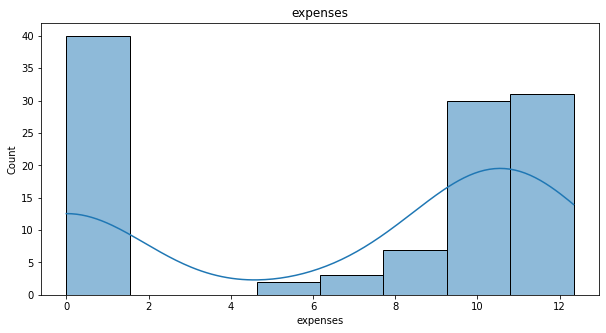

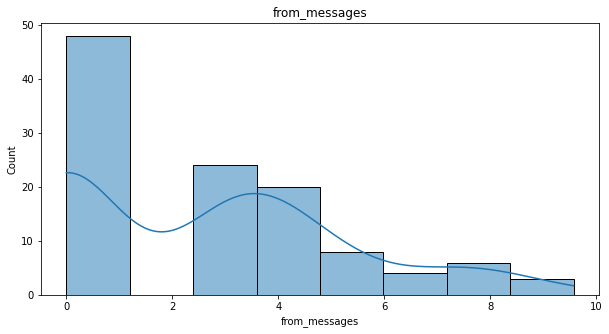

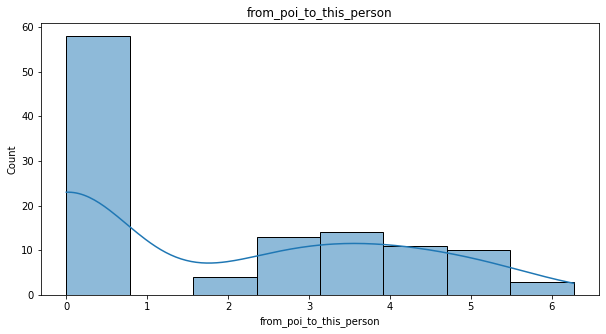

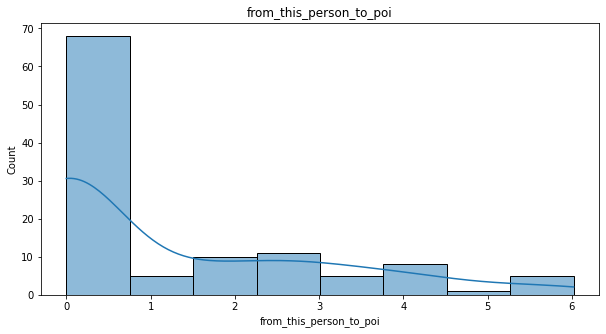

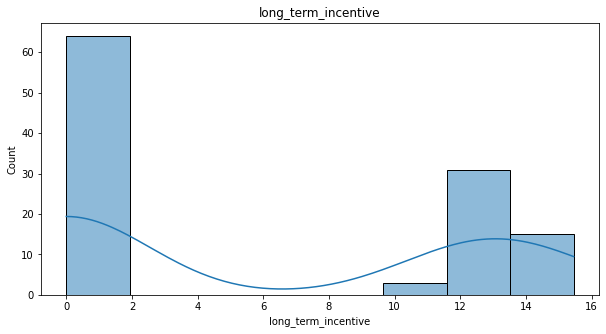

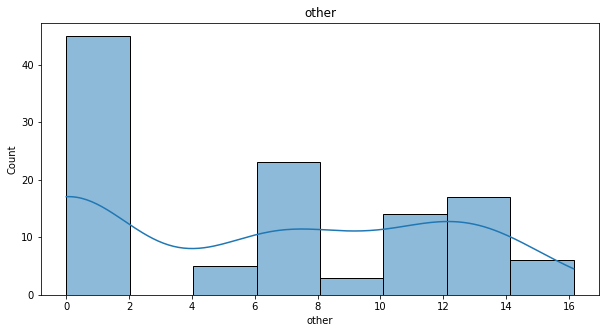

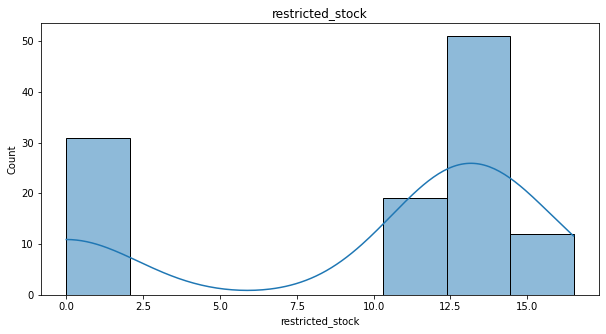

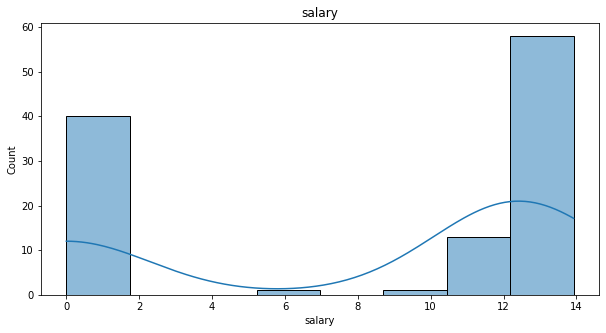

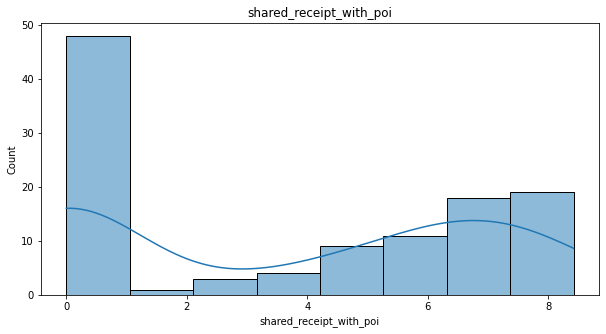

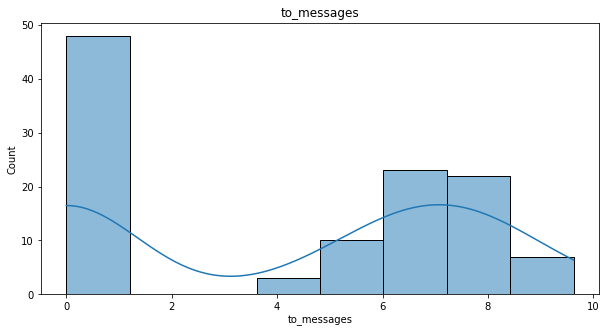

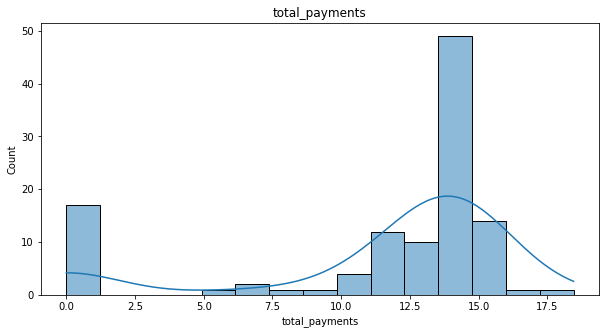

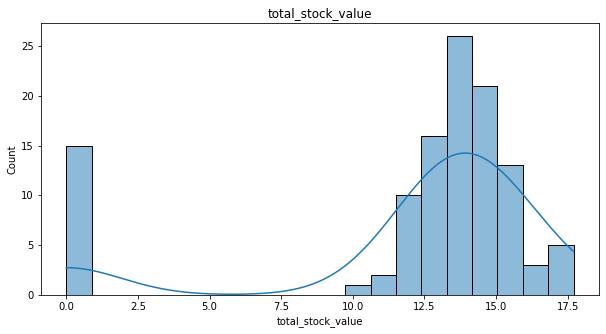

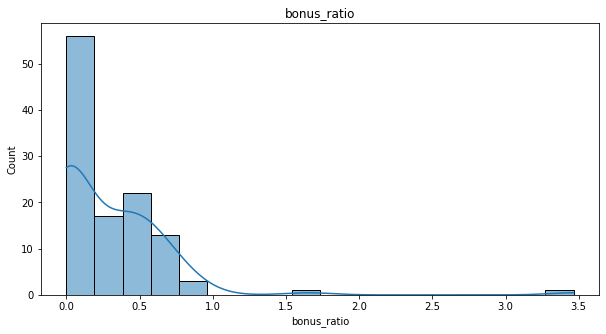

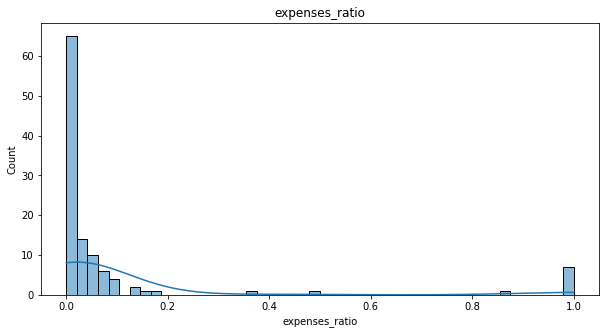

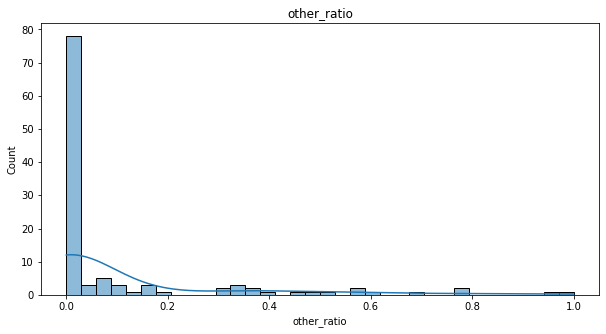

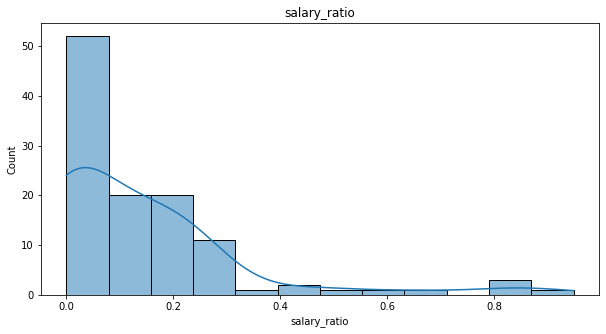

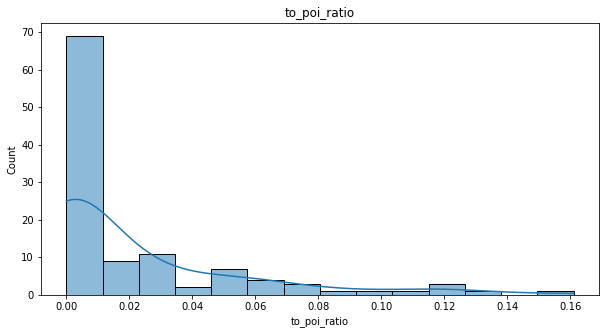

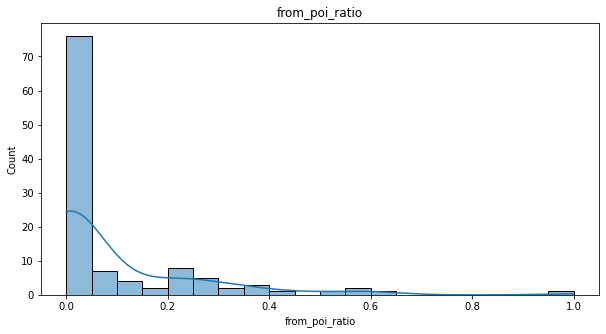

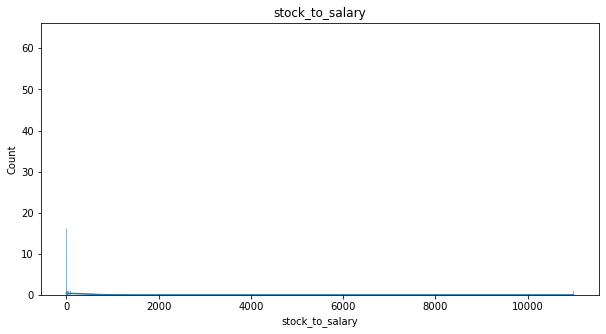

In [9]:
# 基於對資料的了解，我們可以知道空值全都為0
df = df.fillna(0)

for col in df.columns:
    if (col not in bool_features) and (col not in ratio_features):
        df[col] = np.log1p(df[col])

for i in range(len(df.columns)):
    if df.columns[i] not in bool_features:
        plt.figure(figsize=(10,5))
        plt.title(df.columns[i])
        sns.histplot(df[df.columns[i]], kde=True)
plt.show()

In [10]:
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,14.375127,0.0,1.0,0.0,16.800898,10.756860,2.944439,3.761200,1.609438,14.296091,...,6.809039,13.132415,16.930915,3.465003,0.092961,0.346182,0.832860,0.046409,0.222222,53.591559
1,15.538277,0.0,0.0,0.0,16.773022,10.286605,4.691348,4.488636,3.433987,14.467836,...,8.196437,15.976845,17.077203,0.644959,0.003379,0.002548,0.127985,0.024262,0.277778,23.481201
2,12.206078,0.0,1.0,0.0,14.300647,10.038237,3.688879,2.639057,2.708050,0.000000,...,5.420535,14.510599,14.729245,0.099806,0.011420,0.785137,0.105717,0.057778,0.358974,11.771001
3,13.592368,0.0,0.0,0.0,0.000000,11.679583,0.000000,0.000000,0.000000,13.309128,...,0.000000,14.791056,13.800430,0.301590,0.044535,0.342116,0.084560,0.000000,0.000000,4.391485
4,14.038655,0.0,1.0,0.0,0.000000,10.486234,4.976734,5.298317,3.258097,12.835494,...,7.862882,14.309779,11.744259,0.762522,0.021850,0.000296,0.146520,0.076597,0.173611,0.524699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,13.122365,0.0,0.0,0.0,0.000000,9.712024,0.000000,0.000000,0.000000,0.000000,...,0.000000,13.921750,13.145562,0.449605,0.014850,0.320183,0.215363,0.000000,0.000000,2.136659
109,0.000000,0.0,0.0,0.0,0.000000,10.805456,3.737670,2.639057,0.693147,0.000000,...,7.304516,10.805456,0.000000,0.000000,1.000000,0.000000,0.000000,0.008748,0.024390,0.000000
110,12.611541,0.0,0.0,0.0,10.268096,10.362620,4.219508,2.079442,0.000000,0.000000,...,6.801283,14.142431,10.268096,0.216343,0.022826,0.000000,0.472375,0.007795,0.000000,0.043964
111,0.000000,0.0,0.0,0.0,0.000000,6.165418,2.995732,1.609438,2.079442,0.000000,...,6.352629,6.165418,14.611801,0.000000,1.000000,0.000000,0.000000,0.006981,0.368421,0.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
new_df = pd.DataFrame(MM.fit_transform(df), columns=df.columns)
new_df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,0.904383,0.0,1.0,0.0,0.968236,0.871675,0.307583,0.599778,0.267303,0.925097,...,0.707377,0.711566,0.956032,1.000000,0.092961,0.346182,0.878590,0.288138,0.222222,0.004875
1,0.977560,0.0,0.0,0.0,0.966630,0.833568,0.490069,0.715778,0.570333,0.936210,...,0.851511,0.865688,0.964292,0.186135,0.003379,0.002548,0.135012,0.150638,0.277778,0.002136
2,0.767922,0.0,1.0,0.0,0.824147,0.813442,0.385349,0.420836,0.449766,0.000000,...,0.563128,0.786241,0.831711,0.028804,0.011420,0.785137,0.111521,0.358725,0.358974,0.001071
3,0.855137,0.0,0.0,0.0,0.000000,0.946447,0.000000,0.000000,0.000000,0.861230,...,0.000000,0.801437,0.779264,0.087039,0.044535,0.342116,0.089203,0.000000,0.000000,0.000399
4,0.883215,0.0,1.0,0.0,0.000000,0.849745,0.519881,0.844894,0.541120,0.830582,...,0.816859,0.775360,0.663159,0.220064,0.021850,0.000296,0.154565,0.475570,0.173611,0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.825568,0.0,0.0,0.0,0.000000,0.787008,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.754335,0.742286,0.129756,0.014850,0.320183,0.227188,0.000000,0.000000,0.000194
109,0.000000,0.0,0.0,0.0,0.000000,0.875613,0.390446,0.420836,0.115121,0.000000,...,0.758851,0.585482,0.000000,0.000000,1.000000,0.000000,0.000000,0.054316,0.024390,0.000000
110,0.793431,0.0,0.0,0.0,0.591751,0.839728,0.440780,0.331597,0.000000,0.000000,...,0.706571,0.766292,0.579805,0.062436,0.022826,0.000000,0.498311,0.048397,0.000000,0.000004
111,0.000000,0.0,0.0,0.0,0.000000,0.499611,0.312941,0.256648,0.345363,0.000000,...,0.659962,0.334067,0.825079,0.000000,1.000000,0.000000,0.000000,0.043342,0.368421,0.000000


In [12]:
new_df.to_csv('全補0+bool+log+MM.csv')